[08/29 15:41:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...
[08/29 15:41:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
number of the persons: 1
depth of the person: 1990.0
depth mask shape: (62, 80)


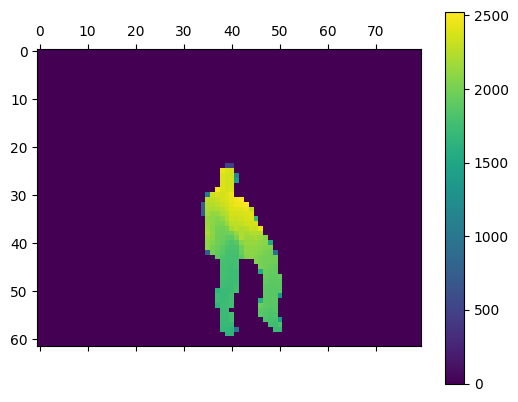

pt_cloud: (288, 3)


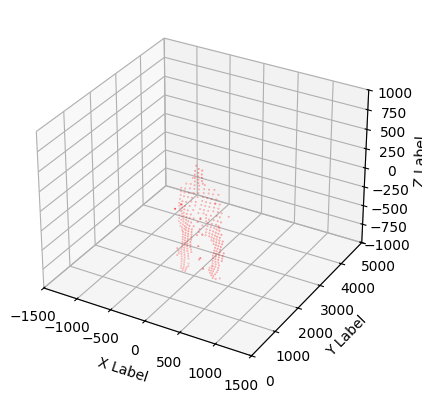

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


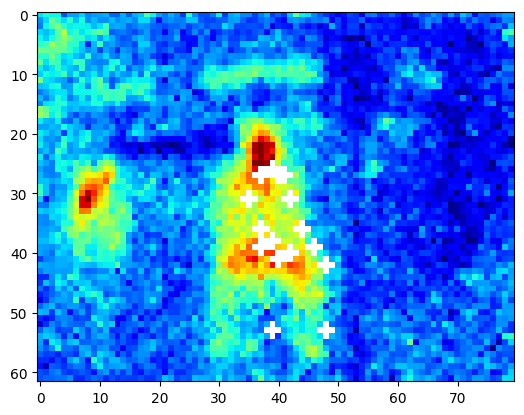

In [6]:
from DataAnnotation import DataAnnotate
from utils import raw_data_loader, colorize_thermal_map
import matplotlib.pyplot as plt
import numpy as np
import cv2

annotator = DataAnnotate("senxor_m08")


slected_index_list = [ 2, 50, 100]

# loading the  raw data
raw_data_folder = 'data'
selected_recording_folder = 'entry0'
seek_camera_data, MLX_data, senxor_m08_data, senxor_m16_data, realsense_depth_data, realsense_color_data = raw_data_loader(raw_data_folder, selected_recording_folder, slected_index_list)

# extracting the depth of the user
sample_index = 1

depth = realsense_depth_data[sample_index]
color = realsense_color_data[sample_index]  
thermal = senxor_m08_data[sample_index] 

results_dict = annotator.forward(color, depth)

print('number of the persons:', results_dict['num_persons'])    
select_person_index = 0

print('depth of the person:', results_dict['depth_person'][select_person_index])

depth_mask = results_dict['depth_mask_person'][select_person_index]
print('depth mask shape:', depth_mask.shape)
plt.matshow(results_dict['depth_mask_person'][select_person_index])
plt.colorbar()
plt.show()

pt_cloud = results_dict['point_cloud_person'][select_person_index]# the point cloud of the person
print('pt_cloud:', pt_cloud.shape) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(pt_cloud)[:, 0], np.array(pt_cloud)[:, 2], -np.array(pt_cloud)[:, 1], c='r', marker='o', s=0.1)
ax.set_xlabel('X Label')
ax.set_xlim(-1500, 1500)
ax.set_ylabel('Y Label')
ax.set_ylim(0, 5000)
ax.set_zlabel('Z Label')
ax.set_zlim(-1000, 1000)
plt.show()

# print('2D pose of the person:', results_dict['2D_pose_person'][select_person_index])
pose = results_dict['2D_pose_person'][select_person_index]
# make the thermal map with color
thermal_colorized = colorize_thermal_map(thermal)
for index,keypoint in enumerate(pose):
    keypoint = keypoint.astype(np.int32)
    cv2.circle(thermal_colorized, (keypoint[0], keypoint[1]), 1, (0, 255, 0), -1)
    # get the label of the keypoint
    # label = Get_COCO_pose_joint_label(index)
    # cv2.putText(thermal_colorized, label, (keypoint[0], keypoint[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)
plt.imshow(thermal_colorized)
plt.show()      
